## Context

We will build a classifier which can assist in diagnosing diabetes.

### Data

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Outcome

> The goal of the classifier is to either say a person has diabetes (1) or not (-1). This is binary classification.

# AdaBoost

AdaBoost (adaptive boosting) trains a sequence of classifiers in such a way that each classifier specializes in correcting the mistakes of the previous classifiers.

As the working of boosting is clearly dependent on the performance of the base learner, AdaBoost will employ $\textbf{weak learners}$ as base models. Weak learners are defined as learners who perform only slightly better than random guessing and are computationally efficient. Because of the (many) mistakes that are made by the individual weak learners, the next model in line will most likely focus on correcting different mistakes, thus creating $\textbf{diverse}$ base models.

>$\textbf{Some advantages:}$ Easy to implement; Doesn't have parameters
that need to be tuned; Doesn't require prior knowledge; Has a good mathematical
foundation that assures good predictions if we have enough training data and a
weak classifier that performs at least slightly better than chance; Can be less prone to overfitting than traditional models

>$\textbf{Some disadvantages:}$ The performance depends on the data and on the
weak classifier; It's susceptible to noise.



### 1.1 Introduction and notation

Consider a $\textbf{binary classification problem}$ and a training
set of the form $(x_1,t_1), ..., (x_N,t_N)$ where each $x_n$ belongs to a
domain $X$ and each label $t_n$ belongs to the label set $Y=\{-1,1\}$.
Additionally, we define a set $M$ of $\textbf{weak classifiers}$ $y_1(\cdot),\dots,y_M(\cdot)$
that takes a value of $x_n$ and try to predict the correct label. Let
$w_{n}^{m}$ be a weight that indicates how important it is for classifier
$y_m(\cdot)$, to make a correct prediction about the label that corresponds to
$x_n$.

AdaBoost iteratively adjusts the weights over the data points such that the weights of the incorrectly classified examples increase, causing the
weak classifiers to focus on the harder training examples. Simply said, for each data point in the AdaBoost algorithm there is a weight that determines how important it is this data point is correctly classified. These weight is modified after each weak classifier is trained such that incorrectly classified data points are received as more important for the next weak classifier that will be trained.

The final strong classifier is based on a weighted sum of these weak classifiers.

### 1.2 Pseudo code


$\textbf{AdaBoost pseudo-code:}$

Let $(x_1,t_1), ..., (x_N,t_N)$ be the training data, where $x_n \in X, t_n \in Y=\{-1,1\}$ and $I$ is the indicator function

Initialize $w_{n}^{1} = 1/N$ for $n=1,...,N$.

For $m=1, ...,M$

1) Train the classifier $y_m(\cdot)$ by minimizing the weighted error function

\begin{equation*}
  \epsilon_m=\sum_{n=1}^{N} w_n^{m}I(y_m(x_n)\neq t_n).
\end{equation*}

 where $I(y_m(x_n) \neq t_n)$ equals 1 when $y_m(x_n) \neq t_n$ and 0 otherwise.

2) Compute $\epsilon_m$ itself.

3)  Compute the classifier weight alpha:
\begin{equation}
    \alpha_m = \frac{1}{2}\ln\left(\frac{1-\epsilon_m}{\epsilon_m}\right)
\end{equation}

4) Update the datapoints weights:
\begin{equation}
    w_{n}^{m+1}=\frac{w_{n}^{m}\exp(\alpha_mI(y_m(x_n) \neq t_n))}{\sum_{k=1}^{N}w_{k}^{m}\exp(\alpha_mI(y_m(x_k) \neq t_k))}
\end{equation}

After finishing the loop, make the final prediction:
\begin{equation}
    Y_M(\cdot)=\mbox{sign}\left(\sum_{m=1}^M\alpha_my_m(\cdot)\right)
\end{equation}



### 1.3 Implementing AdaBoost

#### 1.3.1 Base Learners: decision stumps

## Using a very simple base learner: decision stumps

As a first step we will use a very simple base learner called a decision stump, which is a a 'weak learner'. Weak learners are defined as learners who perform only slightly better than random guessing and are computionally efficient. 

You will see that this classifier is not complex. It can only use 1 feature and it only creates a very simple decision boundary. Because of the (many) mistakes that are made by an individual weak learner, we will later create an ensemble model of decision stumps.

A decision stump will classify a certain sample as either -1 or 1 based on the fact if the value of a certain dimension is either larger or smaller than a threshold $\theta$. The dimension is an input parameter of the decision stump.

$f(x) = \left\{ 
\begin{array}{l l}
  1 & \quad \mbox{if $x>\theta$}\\
  -1 & \quad \mbox{otherwise}\\ \end{array} \right.       ,  $
  
  
To use decision stumps we need to implement two operations:
- applying a decision stump (= make predictions)
- training a decision stump (= learn optimal threshold $\theta$ for a certain dimension)
 
These functions are already implemented and it is not important to know how they work, only which input parameters they need. To understand how a decision stump operates, have a look at how a decision stump makes prediction based on the plot below.

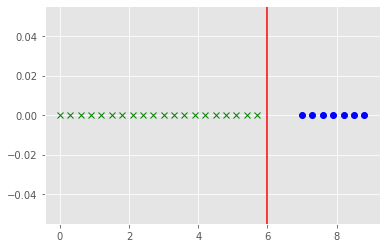

In [1]:
# The following figure illustrates how a decision stump with parameter 'theta' does predictions. 
# The red line represents the decision boundary/threshold theta
# In the plot, everything below theta is classified as 'x' , everything above theta is classified as 'o'

# some imports

import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Select a random theta for illustrative purposes
theta= 6.0

# Define two example arrays on each side of the decision boundary
ar = np.arange(0.0,theta,0.3) 
arr = np.arange(theta+1,9.0,0.3)

# Plot the decision stump boundary 
plt.axvline(theta, c='r')

# Plot how data points on each side of the decision boundary value theta are classified differently
plt.plot(ar, np.zeros_like(ar) , 'x', c='g')
plt.plot(arr, np.zeros_like(arr) , 'o', c='b')
plt.show()

$\textbf{Applying a decision stump}$

In [2]:
def apply_stump(x,theta):
    """
    Function which applies a decision stump on vector x using a threshold theta
    When using this method, each item in the vector x should correspond to a single feature value of the datapoints

    :param x: a vector containing a single feature value for each datapoint (length x == number of datapoints)
    :param theta: decision boundary value
    :return: this function returns the labels of the datapoints based on the prediction of the stump
    """
    # Create vector of ones with the same length as vector x
    output = np.ones(np.shape(x))
    # Set everything below theta to -1
    output[x < theta] = -1
    # return the predictions
    return output

def calculate_accuracy(y, y_hat):
    """
    Calculates the accuracy using the predicted and real labels.
    
    :param y: real labels (shape N x 1)
    :param y_hat: predicted labels (shape N)
    :return: accuracy
    """
    return np.sum(y[:,0]==y_hat)/len(y)

$\textbf{Training a decision stump}$

In [3]:
def train_stump (x,y,w):
    """
    This function 'trains' a decision stump on a column vector x with corresponding labels y, with weights w

    :param x: a n x 1 vector containing the a single feature value for each datapoint (length x == number of datapoints)
    :param y: a n x 1 vector containing the labels corresponding with each datapoint
    :param w: a n x 1 vector containing the weights currently paired with the datapoint indicating
      how important it is in the error function
    :return: the optimal value theta to minimize the weighted error
    """

    # The number of data points
    number_of_data_points = np.shape(x)[0]
    
    # Init empty array with the same length as x
    sums = np.zeros(number_of_data_points)
    
    # Return the indices for an ascending sorted x
    ind = np.argsort(x)
    x_sorted = x[ind]
    
    # Calculate the cumulative weighted sum along x
    sums = np.cumsum(w[ind]*y[ind][:, 0])

    # Determine the extremum
    extremum_index = np.argmax(abs(sums))
    
    # If it's not the last element, split on the value between the two extrema, else just pick the extremum value
    if ((extremum_index+1) < number_of_data_points):
        theta = (x_sorted[extremum_index] + x_sorted[extremum_index+1])  / 2
    else:
        theta = x_sorted[extremum_index]

    # Swap the sign if we found a minimum
    if (sums[extremum_index] == max(sums)):
        theta = -theta  

    # return the optimal decision boundary value
    return theta
        

#### 1.3.2 Imports, getting the data and setting some variables

The code to load the dataset is provided below.

In [4]:
# Imports
import numpy as np
import pandas as pd
import scipy.io as sio

# Load the data, make sure there is a 'data' folder containing the dataset in the same folder as this notebook
data=np.loadtxt('Data/pima-indians-diabetes.data.csv', delimiter=',')
data[data[:,-1]==0,-1] = -1
np.random.seed(1)
np.random.shuffle(data)
N = len(data)

train_data = data[:int(N*0.5), :-1]
test_data = data[int(N*0.5):, :-1]
train_labels = data[:int(N*0.5), [-1]]
test_labels = data[int(N*0.5):, [-1]]

# Define some variables for later use
number_of_training_samples, number_of_dimensions = np.shape(train_data)
number_of_test_samples = np.shape(test_data)[0]

# Hyperparameters of the algorithm
# The number of iterations to boosting rounds of AdaBoost == the number of weak learners trained
number_of_classifiers = 200

print('Training set size: {}'.format(train_data.shape))
print('Test set size:     {}'.format(test_data.shape))

Training set size: (384, 8)
Test set size:     (384, 8)


###  Training a single weak learner

A decision stump makes predictions using a single feature (1D), therefore to train a decision stump on our dataset, we do not only need to determine the optimal  $\theta$ . We also need to determine in each iteration the optimal dimension/feature that the decision stump will use given the current weights.

Complete the following cell such that a decision stump is trained for each dimension. The weights are set such that each datapoint is of equal importance for this assignment (=uniform). The sum of the weights should be 1. Apply your trained stumps to the training set again. Interpret the accuracies you obtain.

In [5]:
################# Initialize some variables #############
# A vector containing the errors of the decision stumps
errors = np.zeros(number_of_dimensions)
################# END Initialize some variables #############

# TASK 1: Set the weights (uniform)
def uniform_weights(number_of_samples):
    w = np.ones(shape=(number_of_samples))
    w = np.divide(w,number_of_samples)
    print(w.shape)
    return w

# TASK 2: train and apply a stump
def train_and_apply_stump(train_data, train_labels, w, dimension):
    """
    This function trains a decision stump on one single feature for the dataset.
    
    :param train_data: training data inputs (shape N x D)
    :param train_labels: training data labels, which are -1 or 1 (shape N x 1)
    :param w: weights (shape N)
    :param dimension: integer indicating the input feature to be trained on
    :return: the optimal theta and output of the stump
    """
    theta = train_stump(train_data[:,dimension],train_labels,w)
    out = apply_stump(train_data[:,dimension],theta)
    return theta, out

w = uniform_weights(number_of_training_samples)

# Train the models for each feature
theta_and_output = [train_and_apply_stump(train_data, train_labels, w, i) for i in range(number_of_dimensions)]
accuracy = [calculate_accuracy(train_labels, x[1]) for x in theta_and_output]

# Print the maximum and minimum of the accuracy
print('Maximum train accuracy (best weak learner performance):   {0:.2f} %'.format(max(accuracy)*100))
print('Minimum train accuracy (worst weak learner performance):  {0:.2f} %'.format(min(accuracy)*100))

(384,)
Maximum train accuracy (best weak learner performance):   76.04 %
Minimum train accuracy (worst weak learner performance):  64.58 %


In [6]:
############################# READ ONLY #############################

### Training the ensemble

You will now implement the training phase of AdaBoost. For this, you will need to train decision stumps for every
dimension in the dataset in every iteration. Next, you will need to select the decision stump that gives the lowest weighted error and update the weights based on the mistakes of this model before moving on to the next generation.

The comments in the code will give you additional directions. Assignment 1 and the pseudo code can guide you further in the right direction. The picture below illustrates the training phase in rounds. Make sure that the picture loads by running this cell.

![Boosting Ensemble](boosting.png)

In [7]:
##### We need to determine the best dimension to train a weak learner on, given the current weights.
# We will keep track of the optimal dimension and the optimal theta for the decision stump in each iteration
# Afterwards, we need to update the weights and compute alpha before going to the next iteration

################# Initialize some variables #############

###### Variables in the global ensemble ######
# A matrix of M (number_of_classifiers) rows, in which a row m, will contain
# the optimal theta in the first column and the best dimension in the second column for best performing
# weak classifier m. 
classifiers = np.zeros((number_of_classifiers,2))

# A vector containing the alpha values for each weak learner which determine how the final combined strong classifier
# is built.
alphas  = np.zeros(number_of_classifiers)
###### END Variables in the global ensemble ######

###### Variables within one round ######
# A vector containing the error on each feature for a single iteration
errors = np.zeros(number_of_dimensions)

# A vector which contains the optimal theta for each dimension determined by a weak learner in a single iteration
thetas = np.zeros(number_of_dimensions)
###### END Variables within one round ######

w = uniform_weights(number_of_training_samples)

################# END Initialize some variables #############

# TASK 1: Calculate the weighted error
def calculate_weighted_error(labels, prediction, w):
    """
    Calculate the weighted error using weights w
    
    :param labels: real data labels, which are -1 or 1 (shape N x 1)
    :param predictions: predicted data labels, which are -1 or 1 (shape N)
    :param w: weights (shape N)
    :return: the weighted error
    """
    I = np.zeros(shape = w.shape)
    for i in range(len(labels)):
        if labels[i] == prediction[i]:
            I[i] = 0
        else:
            I[i] = 1
    error = np.sum(np.multiply(w , I))
    return error
    
# TASK 2: Compute statistics on the best model at one iteration
def best_dimension(errors, theta):
    """
    Calculate the dimension with the lowest error, its theta and its error
    
    :param errors: vector of length D containing the error of corresponding models on the different
    :param theta: vector of length D containing theta of corresponding models on the different 
    :return: the index of the best model, its theta and its error
    """
    idx_best = np.argmin(errors)
    theta_best = theta[idx_best]
    error_best = errors[idx_best]
    return idx_best, theta_best, error_best

# TASK 3: Compute alpha for the current iteration using the error of the best model
def get_alpha(error_best_dimension):
    """
    Computes alpha for the current iteration using the error of the best model
    
    :param error_best_dimension: scalar representing the error of the best model
    :return: the value of alpha
    """
    alpha = np.log((1-error_best_dimension)/error_best_dimension)/2
    return alpha


# TASK 4: Update weights for next round using alpha (see pseudocode)
def update_weights(w, alpha, out_best_dimension_stump, train_labels):
    """
    Updates the weights w for the current iteration
    
    :param w: vector containing the current weights
    :param alpha: current value of alpha
    :param out_best_dimension_stump: prediction of the best model at the current iteration
    :param train_labels: training labels
    :return: the updated weights
    """
    I = np.zeros(shape = w.shape)
    for i in range(len(train_labels)):
        if out_best_dimension_stump[i] == train_labels[i]:
            I[i] = 0
        else:
            I[i] = 1
    d = (np.sum(np.multiply(w,np.exp(alpha * I))))
    for i in range(len(w)):
        e = 1 if out_best_dimension_stump[i] != train_labels[i] else 0
        
        w[i] = (w[i] * np.exp(alpha * e))/ d
        
    return w

# Train this many classifiers, amount of rounds == number of classifiers trained, 1 classifier per round
for training_iteration in range(0,number_of_classifiers):
    # Some progress output
    if training_iteration % 50 == 0:
        print('Training, round {}..'.format(training_iteration))
    # Check all the dimensions to determine the optimal one
    
    theta_and_output = [train_and_apply_stump(train_data, train_labels, w, i) for i in range(number_of_dimensions)]
    errors = [calculate_weighted_error(train_labels, x[1], w) for x in theta_and_output]
    # Determine the best decision stump and store the optimal theta + optimal dimension        
    idx_best, theta_best, error_best_dimension = best_dimension(errors, [x[0] for x in theta_and_output])
    classifiers[training_iteration, 0] = theta_best
    classifiers[training_iteration, 1] = idx_best
    
    # Just recompute the output of the best classifier or instead you can also store it while looping (you can choose)
    out_best_dimension_stump = theta_and_output[idx_best][1]
    
    # Compute alpha for the current iteration
    alpha = get_alpha(error_best_dimension)
    alphas[training_iteration] = alpha
    
    # Update weights for next round using alpha
    w = update_weights(w, alpha, out_best_dimension_stump, train_labels)

print('Training done')

(384,)
Training, round 0..
Training, round 50..
Training, round 100..
Training, round 150..
Training done


##  Making predictions on the train and test set.

We will now determine how the training and test error evolve _with regard to the amount of weak learners in the ensemble_.

For this, we will run the algorithm for a maximum of 200 iterations and store the error scores on both the train and test sets.

This means you have to store error values for a model that uses just a single
weak classifier, a model that uses two weak classifiers,.....  
> **Think about the accuracies that you obtain**

In [8]:
# Initialize the error vectors to 100% error
train_accuracy = np.zeros(number_of_classifiers)
test_accuracy = np.zeros(number_of_classifiers)

# For each number of classifiers == number of rounds
for num_round in range(number_of_classifiers):
    sum_train = np.zeros(number_of_training_samples)
    sum_test = np.zeros(number_of_test_samples)
    # for each classifier up to round num_round (inclusive)
    for n in range(num_round+1):
        weak_classifier = classifiers[n]
        alpha = alphas[n]
        
        out_train = apply_stump(theta=weak_classifier[0], x=train_data[:,int(weak_classifier[1])])
        out_test = apply_stump(theta=weak_classifier[0], x=test_data[:,int(weak_classifier[1])])

        sum_train += alphas[n]*out_train
        sum_test += alphas[n]*out_test
    
    # Make the final prediction by taking the sign of the sum for both train and test set
    final_prediction_train = np.sign(sum_train)
    final_prediction_test = np.sign(sum_test)
    
    # Store the errors
    train_accuracy[num_round] = calculate_accuracy(train_labels,final_prediction_train)
    test_accuracy[num_round] = calculate_accuracy(test_labels,final_prediction_test)
    
# Print the maximum train accuracy and test accuracy
print('Best number of weak learners (boosting rounds): {}'.format(np.argmax(test_accuracy)))
print('AdaBoost maximum training accuracy:   {0:.2f} %'.format(max(train_accuracy)*100))
print('AdaBoost maximum testing accuracy:   {0:.2f} %'.format(max(test_accuracy)*100))

Best number of weak learners (boosting rounds): 32
AdaBoost maximum training accuracy:   79.95 %
AdaBoost maximum testing accuracy:   78.39 %


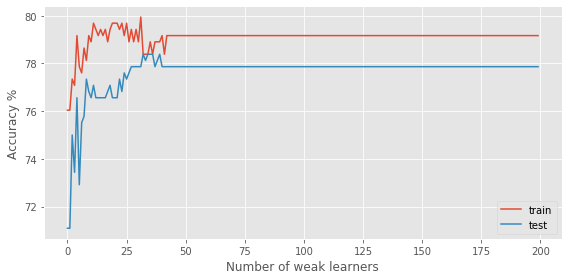

In [9]:
# Plot the train and test error
plt.figure(figsize=(8,4))
axes = plt.gca()
plt.plot(np.array(train_accuracy)*100, label='train')
plt.plot(np.array(test_accuracy)*100, label='test')
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy %')
plt.tight_layout()
plt.legend()

###  Feature importance

A nice additional property of AdaBoost is that it automatically does feature
selection as well. This is very useful when your data is high dimensional
but only a couple of dimensions contain predictive information.

Look at the unique indices (dimensions) you stored in the second column of the variable $\texttt{classifiers}$. Since
you trained more classifiers than there are dimensions, the algorithm obviously
used some dimensions multiple times.
> **How many unique dimensions of the data did the algorithm actually use?**

The amount of unique indices: 5


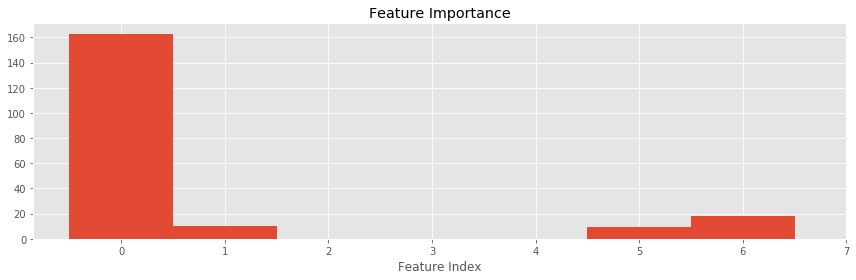

In [10]:
# TASK 1: calculate the amount of unique dimensions
def get_unique_dimensions(classifiers):
    """
    Returns the amount of unique dimensions
    
    :param classifiers: matrix containing the theta and index of the model at all the iterations (defined above)
    :return: the amount of unique dimensions
    """
    amount_of_unique_dimensions = len(np.unique(classifiers[:,1]))
    return amount_of_unique_dimensions

amount_unique_indices = get_unique_dimensions(classifiers)

print('The amount of unique indices: {}'.format(amount_unique_indices))

plt.figure(figsize=(12,4))
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.hist(classifiers[:,1], bins=range(number_of_dimensions), align='left')
plt.xticks(range(number_of_dimensions))
plt.tight_layout()


## 2. Bagging

Another method to create diversity is called Bagging or bootstrap
aggregating. To apply Bagging, one uniformly samples $M$ datasets of $\hat{N}$
datapoints from the actual dataset of $N$ points, trains a different classifier on each of
these datasets and finally averages the predictions these classifiers make on
new unseen data.
As base learner we will now use a decision tree.

![Bagging Ensemble](bagging.png)

> First, calculate the train and test error you find using a single decision tree that has been trained on all the train data. Subsequently, apply bagging for $\hat{N}=50$ and $M=1000$ and write down the result you obtain on the test set as well.
Sample the datasets with replacement.

In [11]:
# Imports
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree
tree = DecisionTreeClassifier()

# TASK 1: Write a function that fits a tree and returns the predictions of test and train data
def fit_and_evaluate_tree(tree, train_data, train_labels, test_data):
    """
    Fits a tree and returns predictions of train and test data
    
    :param tree: DecisionTreeClassifier object
    :param train_data: training data inputs (shape N x D)
    :param train_labels: training data labels, which are -1 or 1 (shape N x 1)
    :param test_data: testing data inputs (shape N2 x D)
    :return: the predictions of the tree on training and testing data
    """
    tree.fit(train_data,train_labels)
    output_training = tree.predict(train_data)
    output_test = tree.predict(test_data)
    
    return output_training, output_test


output_training, output_test = fit_and_evaluate_tree(tree, train_data, train_labels, test_data)
print('1 Decision Tree, Train Accuracy: {0: .3f} % '.format(calculate_accuracy(train_labels, output_training)*100))
print('1 Decision Tree, Test Accuracy:  {0: .3f} %'.format(calculate_accuracy(test_labels, output_test)*100))

1 Decision Tree, Train Accuracy:  100.000 % 
1 Decision Tree, Test Accuracy:   71.354 %


In [12]:
# Do bagging
# Set the number of trees
number_of_trees = 1000
size_of_bag = 50

# TASK 1: write a method that takes the training data as input and trains a tree on a subset
def fit_tree_on_bag(train_data, train_labels, size_of_bag):
    """
    Fits a tree and returns predictions of train and test data
    
    :param train_data: training data inputs (shape N x D)
    :param train_labels: training data labels, which are -1 or 1 (shape N x 1)
    :param size_of_bag: size of the bag
    :return: a DecisionTreeClassifier object
    """
    tree = DecisionTreeClassifier()
    bagidx = np.random.randint(0,len(train_data),size_of_bag)
    tree.fit(train_data[bagidx],train_labels[bagidx])
    
    return tree

trees = [fit_tree_on_bag(train_data, train_labels, size_of_bag) for _ in range(number_of_trees)]

# TASK 2: evaluate an ensemble of trees on data
def evaluate_ensemble(trees, data):
    """
    Obtain predictions for the ensemble (aggregating predictions of individual trees)
    
    :param trees: list of DecisionTreeClassifier objects
    :param data: data inputs (shape N x D)
    :return: ensemble prediction
    """
    o = np.zeros(shape=(len(data)))
    for t in range(len(trees)):
        out = trees[t].predict(data)
        for i in range(len(out)):
            o[i] += out[i]
    for i in range(len(o)):
        if o[i] >= 0:
            o[i] = 1
        else:
            o[i] = -1
    output = o
    return output

# Make final prediction
output_train = evaluate_ensemble(trees, train_data)
output_test = evaluate_ensemble(trees, test_data)

# Print errors
print('Bagging with {0} trees, Train Accuracy:{1: .3f} %'.format(number_of_trees, calculate_accuracy(train_labels, output_train)*100))
print('Bagging with {0} trees, Test Accuracy: {1: .3f} %'.format(number_of_trees, calculate_accuracy(test_labels, output_test)*100))

Bagging with 1000 trees, Train Accuracy: 82.292 %
Bagging with 1000 trees, Test Accuracy:  77.083 %


> **The code above trains and evaluates 1000 decision trees. The following code visualizes how the training and test error evolve for the number of trees used.**

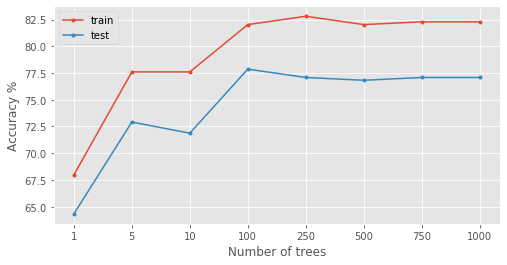

In [13]:
if (len(trees) <1000):
    print('Set trees in code above to 1000 and retrain the ensemble!')
    raise ValueError()
    
number_of_trees = [1,5,10,100,250,500,750,1000]

train_acc = [calculate_accuracy(train_labels, evaluate_ensemble(trees[:n], train_data)) for n in number_of_trees]
test_acc = [calculate_accuracy(test_labels, evaluate_ensemble(trees[:n], test_data)) for n in number_of_trees]

plt.figure(figsize=(8,4))
plt.plot(np.array(train_acc)*100, label='train', marker='.')
plt.plot(np.array(test_acc)*100, label='test',marker='.')
plt.ylabel('Accuracy %')
plt.xlabel('Number of trees')
plt.xticks(range(len(number_of_trees)), number_of_trees)
plt.legend()


Now a single decision tree without bagging is trained. The train and test accuracy for varying levels of depth of the tree is calculated.

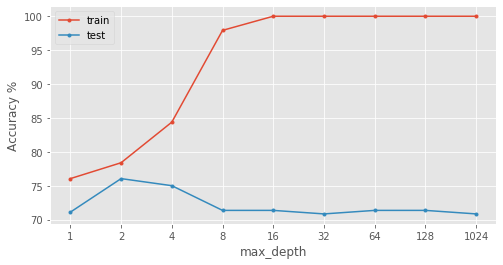

In [14]:
depths = [1,2,4,8,16,32,64,128, 1024]
train_error = []
test_error = []

    
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    
    # Fit and evaluate the tree
    output_train, output_test=fit_and_evaluate_tree(tree, train_data, train_labels, test_data)
    
    # Calculate the accuracy
    train_error.append(calculate_accuracy(train_labels, output_train))
    test_error.append(calculate_accuracy(test_labels, output_test))

# Plot
plt.figure(figsize=(8,4))
plt.plot(np.array(train_error)*100, label='train', marker='.')
plt.plot(np.array(test_error)*100, label='test',marker='.')
plt.xticks(range(len(depths)), depths)
plt.ylabel('Accuracy %')
plt.xlabel('max_depth')
plt.legend()